## Main Goal
In this project, we aim to examine the performance of various machine learning models for predicting sales of video games based on their attributes!  

### Data Understanding
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of [vgchartz.com].
1. **Rank** - Ranking of overall sales
2. **Name** - The games name
3. **Platform** - Platform of the games release (i.e. PC,PS4, etc.)
4. **Year** - Year of the game's release
5. **Genre** - Genre of the game
6. **Publisher** - Publisher of the game
7. **NA_Sales** - Sales in North America (in millions)
8. **EU_Sales** - Sales in Europe (in millions)
9. **JP_Sales** - Sales in Japan (in millions)
10. **Other_Sales** - Sales in the rest of the world (in millions)
11. **Global_Sales** - Total worldwide sales.

Dataset is downloaded from: [https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv("datasets/vgsales.csv")

In [5]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
dataset.shape

(16598, 11)

In [7]:
dataset.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### Dealing With Null values
We assume that there are no underlying patterns in 'Year' and 'Publisher' missing values, and the missing values happened randomly!  
So therefore we remove the rows that have missing values!

In [8]:
# Drop rows with missing values in 'year' and 'publisher'
cleaned_dataset = dataset.dropna(subset=['Year', 'Publisher'])

In [9]:
cleaned_dataset.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### Exploratory Data Analysis
#### What is the overall distribution of Global_Sales and do any outliers stand out in this distribution?

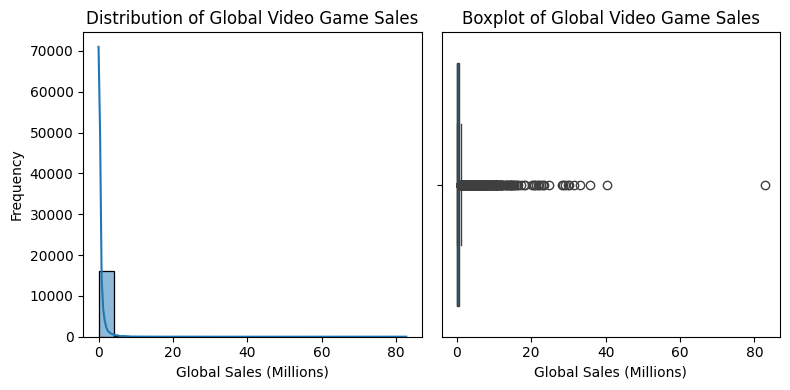

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(data=cleaned_dataset, x='Global_Sales', bins=20, kde=True, ax=axes[0])
axes[0].set_xlabel('Global Sales (Millions)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Global Video Game Sales')

# Boxplot on the right
sns.boxplot(x=cleaned_dataset['Global_Sales'], ax=axes[1])
axes[1].set_xlabel('Global Sales (Millions)')
axes[1].set_title('Boxplot of Global Video Game Sales')

# Adjust layout and display
plt.tight_layout()
plt.show()

> Most of the games have 'Global_Sales' around 1-5 millions copies! There are also many single games that have sold more than the "average range" therefore the plots show lots of outliers!

#### How have average and median Global_Sales evolved by release year?

In [14]:
df_grouped = cleaned_dataset.groupby('Year')['Global_Sales'].agg(['mean', 'median']).reset_index()

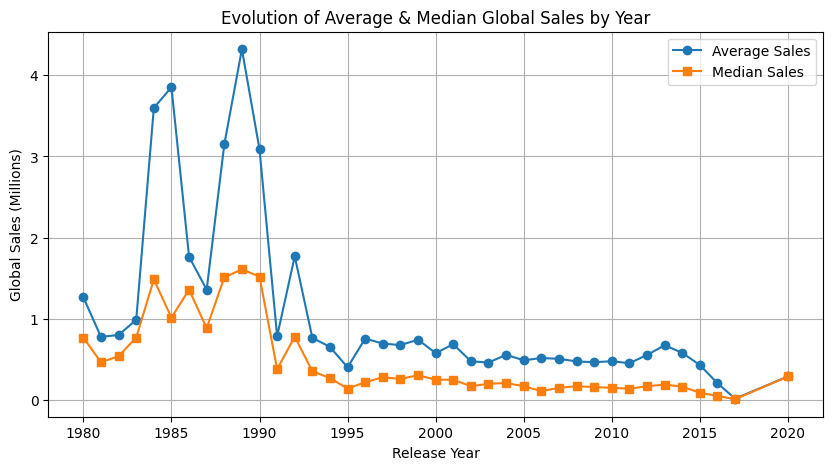

In [17]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_grouped['Year'], df_grouped['mean'], label='Average Sales', marker='o')
plt.plot(df_grouped['Year'], df_grouped['median'], label='Median Sales', marker='s')

plt.xlabel('Release Year')
plt.ylabel('Global Sales (Millions)')
plt.title('Evolution of Average & Median Global Sales by Year')
plt.legend()
plt.grid()
plt.show()

> The large fluctuations in **average sales** suggest that a few blockbuster games significantly impacted the market between 1984 and 1990. Meanwhile, the smaller fluctuations in **median sales** indicate that most games had relatively stable sales, with only a few outliers driving major spikes in the average. This pattern suggests that while a handful of big hits dominated sales early on, the overall market became more consistent over time!